# Descriptive Statistics

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
Image(url= "https://imgs.xkcd.com/comics/boyfriend.png", width = 600)

### Load clean penguin data set

In [3]:
df = pd.read_csv('../data/penguins_simple.csv', sep=';')  # adapt the path to where your file is

In [4]:
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


## Types of variables
- Categorical: Species, Sex
- Ordinal: health status: "good", "medium", "poor"  
- Metric: Flipper Length, Body Mass,...
- Boolean: True and False (0 and 1) 

- discrete variables
- continuous variables 

## Measures of central tendency
- `pandas.Series.mean()` 	
- `pandas.Series.median()` 	
- `pandas.Series.mode()` 		

In [5]:
df['Body Mass (g)'].mean()

4207.057057057057

In [7]:
df[['Body Mass (g)', 'Flipper Length (mm)']].mean()

Body Mass (g)          4207.057057
Flipper Length (mm)     200.966967
dtype: float64

In [9]:
df['Body Mass (g)'].median()

4050.0

In [10]:
df['Body Mass (g)'].mode()

0    3800.0
dtype: float64

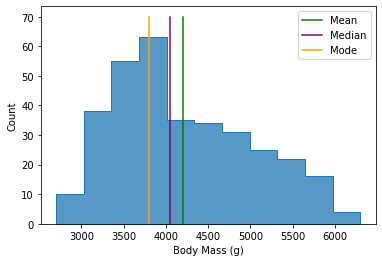

In [13]:
sns.histplot(df['Body Mass (g)'], element='step')
plt.plot([df['Body Mass (g)'].mean()]*2, [0,70], color='green', label='Mean')
plt.plot([df['Body Mass (g)'].median()]*2, [0, 70], color='purple', label='Median')
plt.plot([df['Body Mass (g)'].mode()]*2, [0, 70], color='orange', label='Mode')
plt.legend()

- when the mean and the median are not the same, we have **skewed** data.
- the mode is the highest point in the plot
- the mean gets pulled toward extreme/unusual values
- the median is in the middle

## Measures of dispersion/ spread  🥪
- Range: with `pandas.Series.min()` , `pandas.Series.max()`
- Interquartile Range: with `pandas.Series.quantile()` 
- Variance: `pandas.Series.var()`
- Standard Deviation: `pandas.Series.std()` 	

<AxesSubplot:>

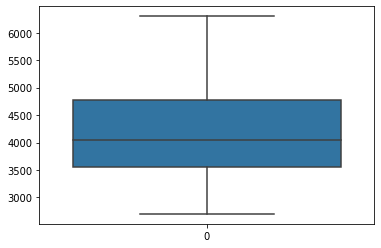

In [14]:
sns.boxplot(data=df['Body Mass (g)'])

In [16]:
# Range
df['Body Mass (g)'].max() - df['Body Mass (g)'].min()

3600.0

In [18]:
df['Body Mass (g)'].quantile(0.75)  - df['Body Mass (g)'].quantile(0.25)

1225.0

In [19]:
# Variance
df_small = df.sample(20)    # takes random samples from the df

In [20]:
df_small

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
284,Gentoo,48.2,15.6,221.0,5100.0,MALE
223,Gentoo,46.8,15.4,215.0,5150.0,MALE
285,Gentoo,46.5,14.8,217.0,5200.0,FEMALE
47,Adelie,42.0,19.5,200.0,4050.0,MALE
305,Gentoo,49.5,16.1,224.0,5650.0,MALE
281,Gentoo,50.7,15.0,223.0,5550.0,MALE
0,Adelie,39.1,18.7,181.0,3750.0,MALE
146,Chinstrap,46.5,17.9,192.0,3500.0,FEMALE
18,Adelie,38.2,18.1,185.0,3950.0,MALE
24,Adelie,40.5,18.9,180.0,3950.0,MALE


In [23]:
df_small.shape

(20, 6)

<AxesSubplot:ylabel='Body Mass (g)'>

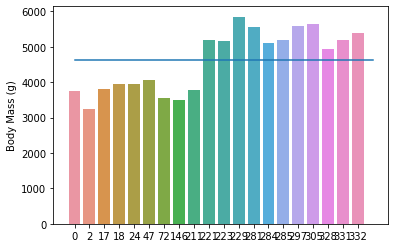

In [21]:
sns.barplot(x=df_small.index, y=df_small['Body Mass (g)'])
sns.lineplot(x=[0, df_small.shape[0]], y=[df_small['Body Mass (g)'].mean()]*2)

<AxesSubplot:ylabel='Body Mass (g)'>

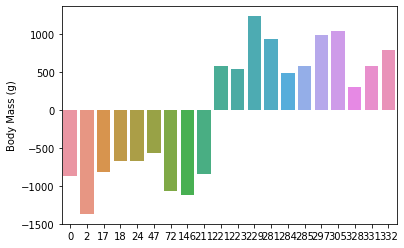

In [22]:
sns.barplot(x=df_small.index, y=df_small['Body Mass (g)'] - df_small['Body Mass (g)'].mean()) # vectorized operation

In [24]:
df['Body Mass (g)'].var()

648372.487698542

In [25]:
# Standard deviation: 
df['Body Mass (g)'].var()**0.5

805.2158019428965

In [26]:
df['Body Mass (g)'].std()

805.2158019428965

In [27]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


## Correlation
- Measures the strength of a linear relationship
- Never forget: Correlation doesn't imply causation!

In [28]:
Image(url= "https://imgs.xkcd.com/comics/correlation.png", width = 600)

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

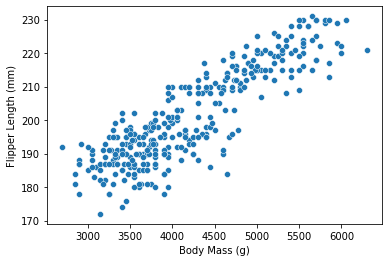

In [29]:
# Is there a linear relationship here? 
sns.scatterplot(data = df, x = 'Body Mass (g)', y = 'Flipper Length (mm)')

- Let's play to train our eye: http://guessthecorrelation.com/

In [37]:
df.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),1.000000,-0.228626,0.653096,0.589451
Culmen Depth (mm),-0.228626,1.000000,-0.577792,-0.472016
Flipper Length (mm),0.653096,-0.577792,1.000000,0.872979
Body Mass (g),0.589451,-0.472016,0.872979,1.000000


In [36]:
df[['Body Mass (g)', 'Flipper Length (mm)']].corr()

,Body Mass (g),Flipper Length (mm)
Body Mass (g),1.000000,0.872979
Flipper Length (mm),0.872979,1.000000


<AxesSubplot:>

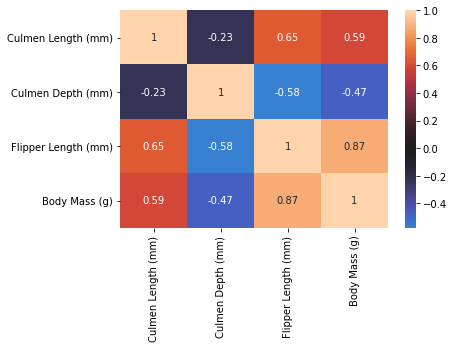

In [35]:
sns.heatmap(df.corr(), annot=True, center=0)

In [ ]:
# spurious correlation 

## What to do this afternoon:
1. Open a new jupyter notebook/.py-file and read in the first two datasets from here: http://krspiced.pythonanywhere.com/chapters/project_gapminder/long_vs_wide.html  (the total fertility-data and the life expectancy-data)
2. Explore the data (have a look at some statistical measures, create some plots and post an interesting one on slack)  
3. You already have all the knowledge to do the steps up until and including step 5 of the project. You don't have to go further today, but you can of course, if you want to. 
4. OPTIONAL: practice with the exercises in the course material:   http://krspiced.pythonanywhere.com/chapters/project_gapminder/descriptive_statistics/README.html